In [1]:
import pickle
import os
import numpy as np

from matplotlib import pyplot as plt
from random import sample

In [2]:
data_dir='./cifar-10-python/cifar-10-batches-py'
class_cifar10=np.load(os.path.join(data_dir,"batches.meta"),allow_pickle=True)

In [3]:
# load cifar10
def load_batch_cifar10(filename,dtype='float64'):
    path = os.path.join(data_dir,filename)
    fi = open(path,'rb')
    batch = pickle.load(fi, encoding='bytes')
    fi.close()
    data = batch[b'data']/255.0
    labels=batch[b'labels']
    return data, labels
def load_cifar10():
    x_train = []
    y_train = []
    for i in range(5):
        x,t = load_batch_cifar10("data_batch_%d"%(i+1))
        x_train.append(x)
        y_train.append(t)
    x_test,y_test = load_batch_cifar10('test_batch')
    x_train = np.concatenate(x_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    
    x_train = x_train.reshape(x_train.shape[0],3,32,32)
    x_test = x_test.reshape(x_test.shape[0],3,32,32)
    
    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = load_cifar10()

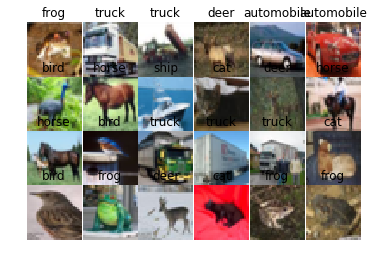

In [4]:
imlist=[]
for i in range(len(x_train)):
    imlist.append(np.hstack(x_train[i].reshape(3,1024,1)).reshape(32,32,3))
for i in range(len(x_test)):
    imlist.append(np.hstack(x_test[i].reshape(3,1024,1)).reshape(32,32,3))
fig = plt.figure()
for j in range(1,25):
    ax = fig.add_subplot(4,6,j)
    plt.title(class_cifar10['label_names'][y_train[j-1]])
    plt.axis('off')
    plt.imshow(imlist[j-1])
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [5]:
len(imlist)

60000

In [6]:
bird_train=[i for i in range(len(y_train)) if y_train[i]==2]
x_train_bird=x_train[bird_train]
bird_test=[i for i in range(len(y_test)) if y_test[i]==2]
x_test_bird=x_test[bird_test]

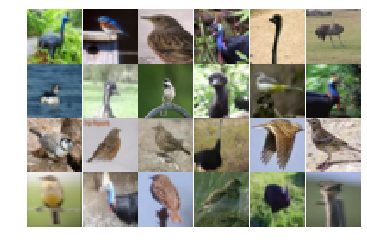

In [7]:
#choose bird
imlist=[]
for i in range(len(x_train_bird)):
    imlist.append(np.hstack(x_train_bird[i].reshape(3,1024,1)).reshape(32,32,3))
for i in range(len(x_test_bird)):
    imlist.append(np.hstack(x_test_bird[i].reshape(3,1024,1)).reshape(32,32,3))
fig = plt.figure()
for j in range(1,25):
    ax = fig.add_subplot(4,6,j)
    plt.axis('off')
    plt.imshow(imlist[j-1])
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [16]:
#choose pixels
pixels=np.vstack(np.vstack(imlist))
index=sample(range(614400),614400)
choose=pixels[index]

In [17]:
#K means
from sklearn.cluster import KMeans

In [24]:
clf = KMeans(n_clusters=4)
clf.fit(choose)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
centers=clf.cluster_centers_
output=[centers[i] for i in clf.labels_]

In [12]:
from skimage.color import rgb2gray

In [13]:
#Graysgale
grayim=[]
for i in range(len(imlist)):
    grayim.append(rgb2gray(imlist[i]))

In [26]:
# CNN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [23]:
y_train=clf.labels_
x_train=choose

In [28]:
model = Sequential()
model.add(Conv2D(filters=32,(5,5),strides=(1,1)))
model.add(Activation('softmax'))
model.add(Conv2D(filters,(5,5),strides=(1,1)))
model.add(Activation('softmax'))
model.add(Dense(64,Activation='softmax'))
model.add(Dense(64,Activation='softmax'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [34]:
train_label=[]
for i in y_train:
    if i==0:
        train_label.append([1,0,0,0])
    if i==1:
        train_label.append([0,1,0,0])
    if i==2:
        train_label.append([0,0,1,0])
    if i==3:
        train_label.append([0,0,0,1])

In [37]:
np.array(train_label).reshape(32,32,4)

ValueError: cannot reshape array of size 24576000 into shape (32,32,4)